no aug


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader, random_split
import os

data_dir = "/content/drive/MyDrive/banana original final"
batch_size = 32
num_classes = 6

basic_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

full_dataset = datasets.ImageFolder(root=data_dir, transform=basic_transforms)

# (80% และ 20%)
train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size
train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# โหลด ResNet18 และปรับแต่งโมเดล
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = models.resnet18(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, num_classes)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


def train(model, loader, criterion, optimizer):
    model.train()
    running_loss = 0.0
    for inputs, labels in loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)
    return running_loss / len(loader.dataset)

def validate(model, loader, criterion, num_classes):
    model.eval()
    running_loss = 0.0
    correct = 0

    tp = [0] * num_classes
    fp = [0] * num_classes
    fn = [0] * num_classes

    with torch.no_grad():
        for inputs, labels in loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_loss += loss.item() * inputs.size(0)

            _, preds = torch.max(outputs, 1)
            correct += torch.sum(preds == labels.data)

            # คำนวณ TP, FP, FN สำหรับแต่ละคลาส
            for i in range(num_classes):
                tp[i] += torch.sum((preds == i) & (labels == i)).item()  # True Positives
                fp[i] += torch.sum((preds == i) & (labels != i)).item()  # False Positives
                fn[i] += torch.sum((preds != i) & (labels == i)).item()  # False Negatives

    accuracy = correct.double() / len(loader.dataset)
    avg_loss = running_loss / len(loader.dataset)

    for i in range(num_classes):
        print(f"Class {i} - TP: {tp[i]}, FP: {fp[i]}, FN: {fn[i]}")

    return avg_loss, accuracy, tp, fp, fn

num_epochs = 7
for epoch in range(num_epochs):
    train_loss = train(model, train_loader, criterion, optimizer)
    val_loss, val_accuracy, tp, fp, fn = validate(model, val_loader, criterion, num_classes)
    print(f"Epoch {epoch+1}/{num_epochs}")
    print(f"Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")

torch.save(model.state_dict(), "banana_disease_resnet18.pth")


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 107MB/s]


Class 0 - TP: 9, FP: 25, FN: 0
Class 1 - TP: 11, FP: 0, FN: 17
Class 2 - TP: 11, FP: 17, FN: 6
Class 3 - TP: 5, FP: 0, FN: 10
Class 4 - TP: 5, FP: 2, FN: 5
Class 5 - TP: 1, FP: 0, FN: 6
Epoch 1/7
Train Loss: 0.8064, Validation Loss: 6.6113, Validation Accuracy: 0.4884
Class 0 - TP: 6, FP: 8, FN: 3
Class 1 - TP: 24, FP: 1, FN: 4
Class 2 - TP: 17, FP: 5, FN: 0
Class 3 - TP: 1, FP: 0, FN: 14
Class 4 - TP: 9, FP: 7, FN: 1
Class 5 - TP: 5, FP: 3, FN: 2
Epoch 2/7
Train Loss: 0.3814, Validation Loss: 1.2353, Validation Accuracy: 0.7209
Class 0 - TP: 5, FP: 7, FN: 4
Class 1 - TP: 28, FP: 1, FN: 0
Class 2 - TP: 16, FP: 1, FN: 1
Class 3 - TP: 9, FP: 0, FN: 6
Class 4 - TP: 8, FP: 4, FN: 2
Class 5 - TP: 7, FP: 0, FN: 0
Epoch 3/7
Train Loss: 0.3252, Validation Loss: 0.9805, Validation Accuracy: 0.8488
Class 0 - TP: 9, FP: 2, FN: 0
Class 1 - TP: 28, FP: 4, FN: 0
Class 2 - TP: 16, FP: 0, FN: 1
Class 3 - TP: 14, FP: 2, FN: 1
Class 4 - TP: 6, FP: 0, FN: 4
Class 5 - TP: 5, FP: 0, FN: 2
Epoch 4/7
Train L

aug


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader, random_split
import os

data_dir = "/content/drive/MyDrive/banana original + aug final"
batch_size = 32
num_classes = 6

basic_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

full_dataset = datasets.ImageFolder(root=data_dir, transform=basic_transforms)

# (80% และ 20%)
train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size
train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# โหลด ResNet18 และปรับแต่งโมเดล
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = models.resnet18(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, num_classes)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


def train(model, loader, criterion, optimizer):
    model.train()
    running_loss = 0.0
    for inputs, labels in loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)
    return running_loss / len(loader.dataset)

def validate(model, loader, criterion, num_classes):
    model.eval()
    running_loss = 0.0
    correct = 0

    tp = [0] * num_classes
    fp = [0] * num_classes
    fn = [0] * num_classes

    with torch.no_grad():
        for inputs, labels in loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_loss += loss.item() * inputs.size(0)

            _, preds = torch.max(outputs, 1)
            correct += torch.sum(preds == labels.data)

            # คำนวณ TP, FP, FN สำหรับแต่ละคลาส
            for i in range(num_classes):
                tp[i] += torch.sum((preds == i) & (labels == i)).item()  # True Positives
                fp[i] += torch.sum((preds == i) & (labels != i)).item()  # False Positives
                fn[i] += torch.sum((preds != i) & (labels == i)).item()  # False Negatives

    accuracy = correct.double() / len(loader.dataset)
    avg_loss = running_loss / len(loader.dataset)

    for i in range(num_classes):
        print(f"Class {i} - TP: {tp[i]}, FP: {fp[i]}, FN: {fn[i]}")

    return avg_loss, accuracy, tp, fp, fn

num_epochs = 14
for epoch in range(num_epochs):
    train_loss = train(model, train_loader, criterion, optimizer)
    val_loss, val_accuracy, tp, fp, fn = validate(model, val_loader, criterion, num_classes)
    print(f"Epoch {epoch+1}/{num_epochs}")
    print(f"Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")

torch.save(model.state_dict(), "banana_disease_resnet18.pth")


Class 0 - TP: 91, FP: 98, FN: 0
Class 1 - TP: 77, FP: 4, FN: 1
Class 2 - TP: 58, FP: 0, FN: 6
Class 3 - TP: 32, FP: 0, FN: 49
Class 4 - TP: 67, FP: 27, FN: 12
Class 5 - TP: 51, FP: 0, FN: 61
Epoch 1/14
Train Loss: 0.5437, Validation Loss: 0.9324, Validation Accuracy: 0.7446
Class 0 - TP: 77, FP: 4, FN: 14
Class 1 - TP: 70, FP: 0, FN: 8
Class 2 - TP: 62, FP: 13, FN: 2
Class 3 - TP: 80, FP: 8, FN: 1
Class 4 - TP: 71, FP: 6, FN: 8
Class 5 - TP: 110, FP: 4, FN: 2
Epoch 2/14
Train Loss: 0.2665, Validation Loss: 0.2661, Validation Accuracy: 0.9307
Class 0 - TP: 91, FP: 48, FN: 0
Class 1 - TP: 70, FP: 0, FN: 8
Class 2 - TP: 53, FP: 1, FN: 11
Class 3 - TP: 79, FP: 7, FN: 2
Class 4 - TP: 76, FP: 2, FN: 3
Class 5 - TP: 77, FP: 1, FN: 35
Epoch 3/14
Train Loss: 0.2240, Validation Loss: 0.4033, Validation Accuracy: 0.8832
Class 0 - TP: 82, FP: 52, FN: 9
Class 1 - TP: 78, FP: 4, FN: 0
Class 2 - TP: 60, FP: 0, FN: 4
Class 3 - TP: 81, FP: 0, FN: 0
Class 4 - TP: 79, FP: 15, FN: 0
Class 5 - TP: 53, FP: 

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1827: FutureWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  self._maybe_warn_non_full_backward_hook(args, result, grad_fn)


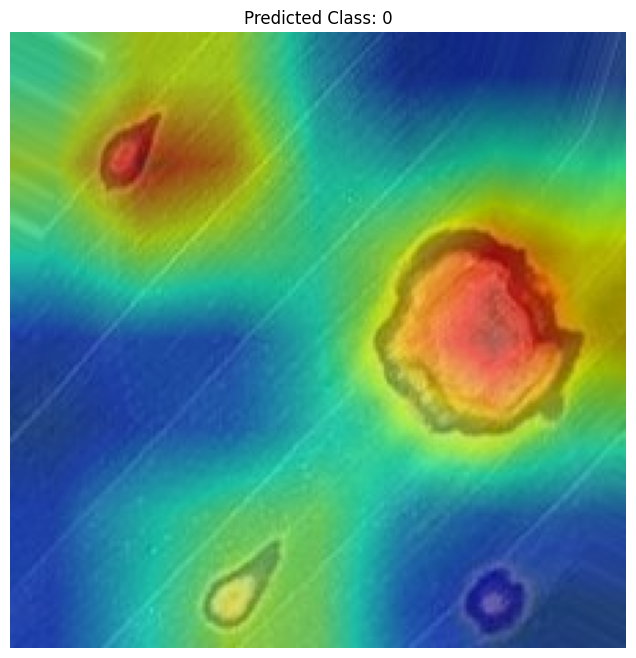

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# ฟังก์ชัน Grad-CAM
def generate_cam(model, image, target_layer, class_idx):
    model.eval()
    gradients = []
    activations = []

    # Hook สำหรับดึง Activation และ Gradient
    def hook_function(module, input, output):
        activations.append(output)
        return None

    def backward_hook_function(module, grad_in, grad_out):
        gradients.append(grad_out[0])
        return None

    # Register hooks
    handle_forward = target_layer.register_forward_hook(hook_function)
    handle_backward = target_layer.register_backward_hook(backward_hook_function)

    # Forward pass และ backward pass
    output = model(image)
    one_hot = torch.zeros_like(output)
    one_hot[0][class_idx] = 1
    model.zero_grad()
    output.backward(gradient=one_hot)

    # ดึง Gradients และ Activations
    grad = gradients[0].cpu().numpy().squeeze()
    activation = activations[0].detach().cpu().numpy().squeeze()

    # คำนวณ Weighted Activations
    weights = np.mean(grad, axis=(1, 2))  # Global average pooling
    cam = np.zeros(activation.shape[1:], dtype=np.float32)
    for i, w in enumerate(weights):
        cam += w * activation[i]

    # Normalization
    cam = np.maximum(cam, 0)
    cam = cam / np.max(cam)
    cam = cv2.resize(cam, (image.shape[2], image.shape[3]))

    # ลบ Hook
    handle_forward.remove()
    handle_backward.remove()

    return cam

# ฟังก์ชัน Visualization
def visualize_cam(cam, image_tensor, title="Grad-CAM"):
    cam = np.uint8(255 * cam)
    cam = cv2.applyColorMap(cam, cv2.COLORMAP_JET)

    # De-normalize ภาพ
    image_np = image_tensor.permute(1, 2, 0).cpu().numpy()
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    image_np = (image_np * std + mean).clip(0, 1)

    # Blend CAM กับภาพต้นฉบับ
    blended = cv2.addWeighted(cv2.cvtColor(cam, cv2.COLOR_BGR2RGB), 0.5, (image_np * 255).astype(np.uint8), 0.5, 0)

    plt.figure(figsize=(8, 8))
    plt.imshow(blended)
    plt.axis('off')
    plt.title(title)
    plt.show()

# ตัวอย่างการใช้งาน Grad-CAM
sample_image, label = val_dataset[0]  # เลือกภาพจาก validation dataset
sample_image_tensor = sample_image.unsqueeze(0).to(device)  # เตรียมภาพสำหรับโมเดล
target_layer = model.layer4[-1]  # เลือกเลเยอร์เป้าหมาย (ResNet18 ใช้ layer4[-1])
predicted_class = torch.argmax(model(sample_image_tensor)).item()  # Class ที่โมเดลทำนาย
cam = generate_cam(model, sample_image_tensor, target_layer, predicted_class)  # สร้าง Grad-CAM
visualize_cam(cam, sample_image, title=f"Predicted Class: {predicted_class}")  # แสดงภาพ


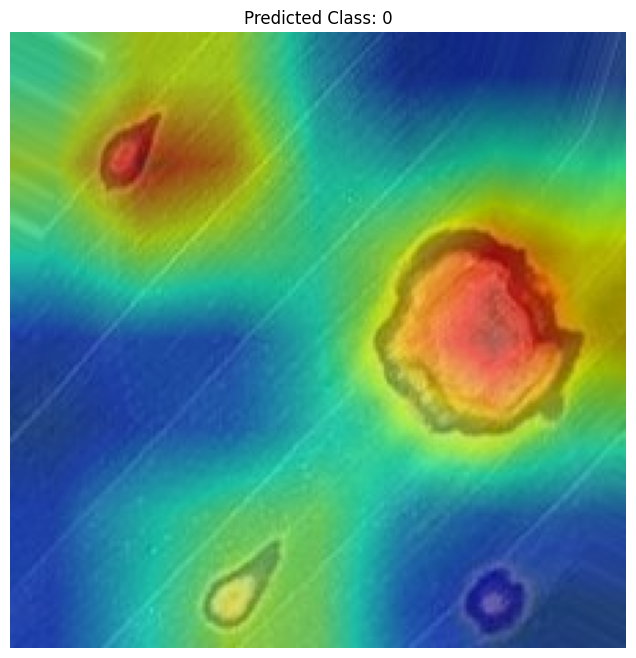

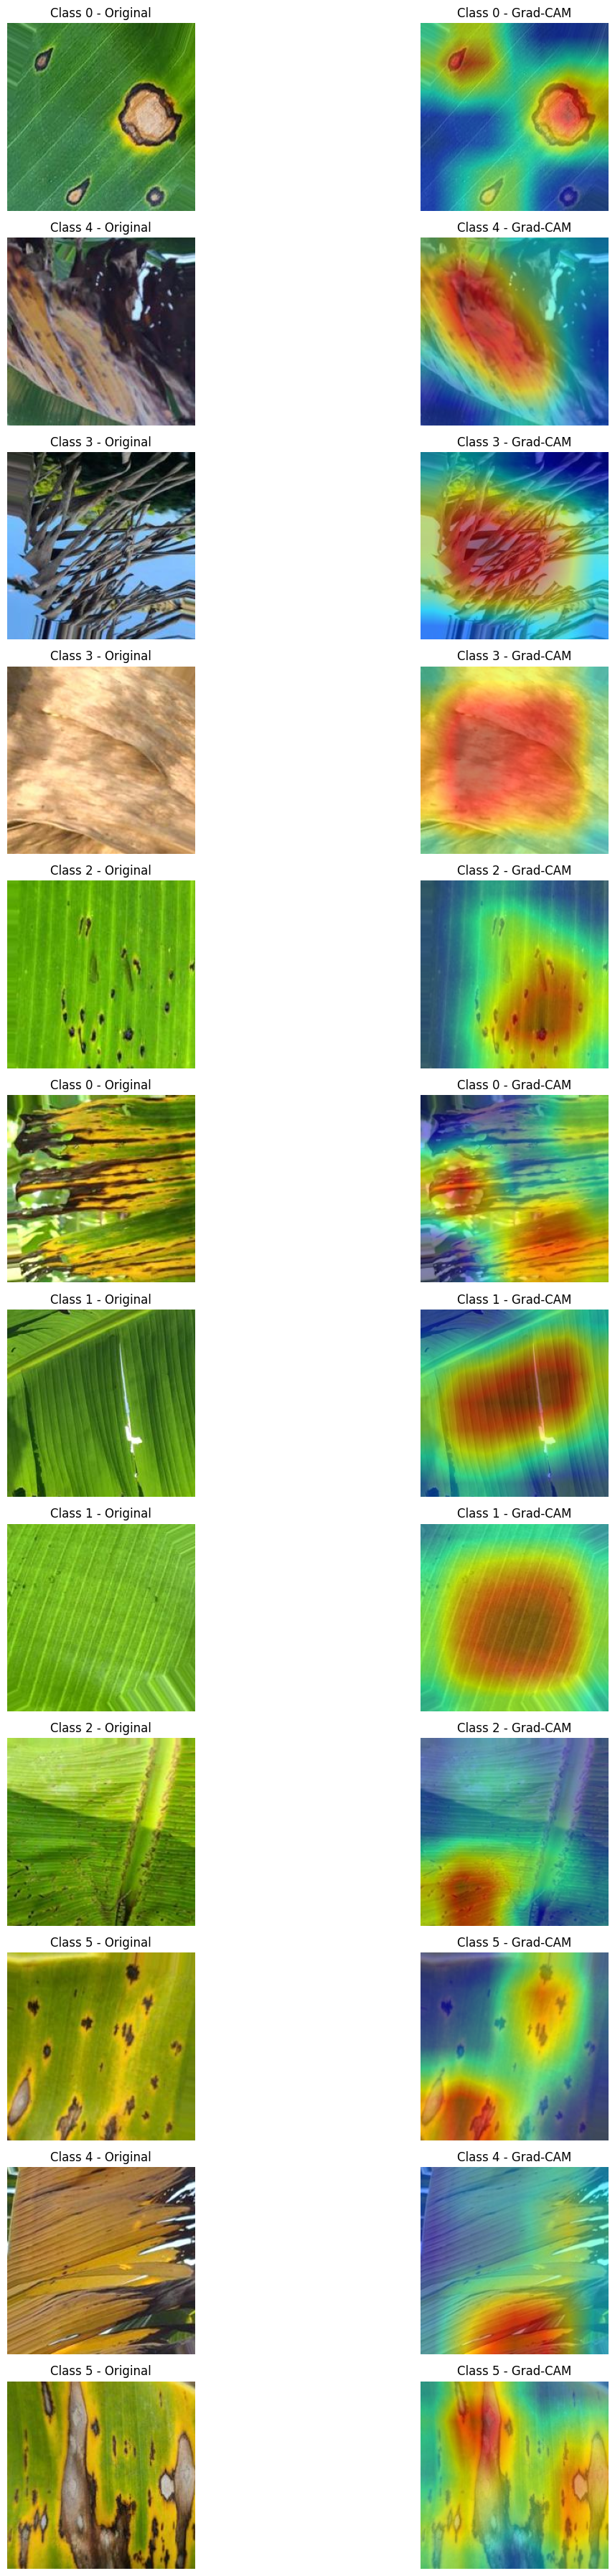

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# ฟังก์ชัน Grad-CAM
def generate_cam(model, image, target_layer, class_idx):
    model.eval()
    gradients = []
    activations = []

    # Hook สำหรับดึง Activation และ Gradient
    def hook_function(module, input, output):
        activations.append(output)
        return None

    def backward_hook_function(module, grad_in, grad_out):
        gradients.append(grad_out[0])
        return None

    # Register hooks
    handle_forward = target_layer.register_forward_hook(hook_function)
    handle_backward = target_layer.register_backward_hook(backward_hook_function)

    # Forward pass และ backward pass
    output = model(image)
    one_hot = torch.zeros_like(output)
    one_hot[0][class_idx] = 1
    model.zero_grad()
    output.backward(gradient=one_hot)

    # ดึง Gradients และ Activations
    grad = gradients[0].cpu().numpy().squeeze()
    activation = activations[0].detach().cpu().numpy().squeeze()

    # คำนวณ Weighted Activations
    weights = np.mean(grad, axis=(1, 2))  # Global average pooling
    cam = np.zeros(activation.shape[1:], dtype=np.float32)
    for i, w in enumerate(weights):
        cam += w * activation[i]

    # Normalization
    cam = np.maximum(cam, 0)
    cam = cam / np.max(cam)
    cam = cv2.resize(cam, (image.shape[2], image.shape[3]))

    # ลบ Hook
    handle_forward.remove()
    handle_backward.remove()

    return cam

# ฟังก์ชัน Visualization สำหรับภาพเดี่ยว
def visualize_cam(cam, image_tensor, title="Grad-CAM"):
    cam = np.uint8(255 * cam)
    cam = cv2.applyColorMap(cam, cv2.COLORMAP_JET)

    # De-normalize ภาพ
    image_np = image_tensor.permute(1, 2, 0).cpu().numpy()
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    image_np = (image_np * std + mean).clip(0, 1)

    # Blend CAM กับภาพต้นฉบับ
    blended = cv2.addWeighted(cv2.cvtColor(cam, cv2.COLOR_BGR2RGB), 0.5, (image_np * 255).astype(np.uint8), 0.5, 0)

    plt.figure(figsize=(8, 8))
    plt.imshow(blended)
    plt.axis('off')
    plt.title(title)
    plt.show()

# ฟังก์ชัน Visualization สำหรับหลายภาพในแต่ละคลาส
def visualize_samples_per_class(dataset, model, target_layer, num_classes, samples_per_class=2):
    """
    แสดงตัวอย่าง Grad-CAM 2 รูปต่อคลาส พร้อมระบุ Grad-CAM และภาพต้นฉบับข้างกัน
    """
    class_count = {i: 0 for i in range(num_classes)}  # นับจำนวนรูปต่อคลาส
    plt.figure(figsize=(15, num_classes * samples_per_class * 3))

    sample_idx = 0
    for idx, (image, label) in enumerate(dataset):
        if class_count[label] < samples_per_class:
            # เตรียมข้อมูล
            image_tensor = image.unsqueeze(0).to(device)
            predicted_class = torch.argmax(model(image_tensor)).item()

            # สร้าง Grad-CAM
            cam = generate_cam(model, image_tensor, target_layer, predicted_class)

            # De-normalize ภาพ
            image_np = image.permute(1, 2, 0).cpu().numpy()
            mean = np.array([0.485, 0.456, 0.406])
            std = np.array([0.229, 0.224, 0.225])
            image_np = (image_np * std + mean).clip(0, 1)

            # Blend Grad-CAM กับภาพต้นฉบับ
            cam_blended = cv2.addWeighted(
                cv2.cvtColor((cv2.applyColorMap((cam * 255).astype(np.uint8), cv2.COLORMAP_JET)), cv2.COLOR_BGR2RGB),
                0.5,
                (image_np * 255).astype(np.uint8),
                0.5,
                0
            )

            # แสดงภาพต้นฉบับ
            plt.subplot(num_classes * samples_per_class, 2, sample_idx * 2 + 1)
            plt.imshow(image_np)
            plt.title(f"Class {label} - Original")
            plt.axis('off')

            # แสดง Grad-CAM
            plt.subplot(num_classes * samples_per_class, 2, sample_idx * 2 + 2)
            plt.imshow(cam_blended)
            plt.title(f"Class {label} - Grad-CAM")
            plt.axis('off')

            # เพิ่มจำนวนรูปต่อคลาส
            class_count[label] += 1
            sample_idx += 1

            # ตรวจสอบว่าครบแล้วหรือยัง
            if all(c == samples_per_class for c in class_count.values()):
                break

    plt.tight_layout()
    plt.show()

# ตัวอย่างการใช้งาน Grad-CAM สำหรับภาพเดี่ยว
sample_image, label = val_dataset[0]  # เลือกภาพจาก validation dataset
sample_image_tensor = sample_image.unsqueeze(0).to(device)  # เตรียมภาพสำหรับโมเดล
target_layer = model.layer4[-1]  # เลือกเลเยอร์เป้าหมาย (ResNet18 ใช้ layer4[-1])
predicted_class = torch.argmax(model(sample_image_tensor)).item()  # Class ที่โมเดลทำนาย
cam = generate_cam(model, sample_image_tensor, target_layer, predicted_class)  # สร้าง Grad-CAM
visualize_cam(cam, sample_image, title=f"Predicted Class: {predicted_class}")  # แสดงภาพ

# ตัวอย่างการใช้งาน Grad-CAM สำหรับหลายภาพในแต่ละคลาส
visualize_samples_per_class(val_dataset, model, model.layer4[-1], num_classes=num_classes, samples_per_class=2)
